In [87]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sci_plt
from pprint import pprint
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import time

pd.set_option('display.width', 250)        
pd.set_option('display.max_columns', None)
pd.options.display.max_columns= None

In [88]:
   # Sector-ticker mapping
sector_tickers = {
       "RELIANCE.NS", "HDFCBANK.NS", "BHARTIARTL.NS", "TCS.NS", "ICICIBANK.NS",
    "SBIN.NS", "HINDUNILVR.NS", "INFY.NS", "BAJFINANCE.NS", "ITC.NS",
    "LT.NS", "MARUTI.NS", "M&M.NS", "ASIANPAINT.NS", "AXISBANK.NS",
    "KOTAKBANK.NS", "HCLTECH.NS", "ULTRACEMCO.NS", "NESTLEIND.NS", "TECHM.NS",
    "SUNPHARMA.NS", "TITAN.NS", "POWERGRID.NS", "ONGC.NS", "WIPRO.NS",
    "BAJAJFINSV.NS", "DIVISLAB.NS", "ADANIPORTS.NS", "TATASTEEL.NS", "GRASIM.NS"
   }

   # Fetch historical data
sector_data = []
for tickers in sector_tickers:
           try:
               stock = yf.Ticker(tickers)
               hist = stock.history(period="5y")[["Open","Close", "Volume"]]
               hist = hist.reset_index()
               hist["tickers"] = tickers
               sector_data.append(hist)
               time.sleep(0.5)  # Avoid rate limiting
           except Exception as e:
               print(f"Error fetching data for {tickers}: {e}")

   # Combine into a single DataFrame
all_sector_data = pd.concat(sector_data, ignore_index=True)
all_sector_data = all_sector_data[["Date", "tickers","Open", "Close", "Volume"]]

   # Save to CSV 
all_sector_data.to_csv("C:/Users/Daksh/Desktop/dakshpy/portfolio-optimization/stock_data.csv", index=False)
print(all_sector_data.head())

                       Date  tickers        Open       Close   Volume
0 2020-08-24 00:00:00+05:30  INFY.NS  842.216747  842.572510  5798574
1 2020-08-25 00:00:00+05:30  INFY.NS  842.661448  834.301514  6233918
2 2020-08-26 00:00:00+05:30  INFY.NS  837.103008  845.596313  5153601
3 2020-08-27 00:00:00+05:30  INFY.NS  853.778294  842.261169  6154280
4 2020-08-28 00:00:00+05:30  INFY.NS  846.174428  831.766907  7593610


In [89]:
stock_df= pd.read_csv("C:/Users/Daksh/Desktop/dakshpy/portfolio-optimization/stock_data.csv")
pd.options.display.max_columns=None
print(stock_df.head(10))
print(stock_df.tail())
print(stock_df.dtypes)
print(stock_df.info)
tickers=[  "RELIANCE.NS", "HDFCBANK.NS", "BHARTIARTL.NS", "TCS.NS", "ICICIBANK.NS",
    "SBIN.NS", "HINDUNILVR.NS", "INFY.NS", "BAJFINANCE.NS", "ITC.NS",
    "LT.NS", "MARUTI.NS", "M&M.NS", "ASIANPAINT.NS", "AXISBANK.NS",
    "KOTAKBANK.NS", "HCLTECH.NS", "ULTRACEMCO.NS", "NESTLEIND.NS", "TECHM.NS",
    "SUNPHARMA.NS", "TITAN.NS", "POWERGRID.NS", "ONGC.NS", "WIPRO.NS",
    "BAJAJFINSV.NS", "DIVISLAB.NS", "ADANIPORTS.NS", "TATASTEEL.NS", "GRASIM.NS"]

                        Date  tickers        Open       Close    Volume
0  2020-08-24 00:00:00+05:30  INFY.NS  842.216747  842.572510   5798574
1  2020-08-25 00:00:00+05:30  INFY.NS  842.661448  834.301514   6233918
2  2020-08-26 00:00:00+05:30  INFY.NS  837.103008  845.596313   5153601
3  2020-08-27 00:00:00+05:30  INFY.NS  853.778294  842.261169   6154280
4  2020-08-28 00:00:00+05:30  INFY.NS  846.174428  831.766907   7593610
5  2020-08-31 00:00:00+05:30  INFY.NS  831.766938  825.852722  12808355
6  2020-09-01 00:00:00+05:30  INFY.NS  823.762730  813.001587   6907773
7  2020-09-02 00:00:00+05:30  INFY.NS  813.757486  821.761658   5678118
8  2020-09-03 00:00:00+05:30  INFY.NS  823.985002  832.033630   8827948
9  2020-09-04 00:00:00+05:30  INFY.NS  813.757469  817.448303   8650342
                            Date        tickers        Open       Close    Volume
37165  2025-08-18 00:00:00+05:30  BAJFINANCE.NS  875.000000  905.200012  16277779
37166  2025-08-19 00:00:00+05:30  BAJFINANCE

In [90]:
number_of_tickers= len(tickers)
#Grab the colums that we need

stock_df= stock_df.pivot(index='Date', columns='tickers', values= 'Close')
print(stock_df.head(10))

tickers                    ADANIPORTS.NS  ASIANPAINT.NS  AXISBANK.NS  BAJAJFINSV.NS  BAJFINANCE.NS  BHARTIARTL.NS  DIVISLAB.NS   GRASIM.NS  HCLTECH.NS  HDFCBANK.NS  HINDUNILVR.NS  ICICIBANK.NS     INFY.NS      ITC.NS  KOTAKBANK.NS       LT.NS  \
Date                                                                                                                                                                                                                                                 
2020-08-24 00:00:00+05:30     338.780365    1878.177368   443.946350     638.608276     342.533783     505.480530  3143.114502  652.587708  587.466492  1060.675537    2028.871826    367.869781  842.572510  162.052505   1381.478638  942.874878   
2020-08-25 00:00:00+05:30     335.965302    1914.981934   449.921417     648.800415     357.330627     507.159393  3148.643799  654.725647  584.053406  1063.191772    2014.726196    373.672882  834.301514  160.981491   1394.275024  932.460266   
2020-08-26 00:00

In [91]:
# Calculate the log expected return
log_return = np.log(1+ stock_df.pct_change())

# generate some random weights
random_weights= np.array(np.random.random(number_of_tickers))

#generate the rebalance rate, they must sum up to 1
rebalanace_weights= random_weights/np.sum(random_weights)


#calculate the expected return

exp_return= np.sum((log_return.mean() * rebalanace_weights)*252)

#calculate the expected valotitily, Annualized

exp_vol= np.sqrt(
    np.dot(
        rebalanace_weights.T,
        np.dot(
            log_return.cov()* 252,
            rebalanace_weights
        )))
#Risk free Return
rf_return= 0.0658
#calculate the Sharpe Ratio
Sharpe_ratio= (exp_return-rf_return)/ exp_vol

#putting weights in data frame

weights_df= pd.DataFrame(data={'random_weights': random_weights,'rebalanace_weights':rebalanace_weights})
print(' ')
print('PORTFOLIO WEIGHTS')
print('-'*80)
print(weights_df)
print('-'*80)

#putting other metrics in data frame

metrics_df= pd.DataFrame(data={'Expected Portfolio Return': exp_return, 'Expected Portfolio Volatility': exp_vol, 'Portfolio Sharpe Ratio': Sharpe_ratio},index=[0])
print(' ')
print('PORTFOLIO MERTRICS')
print('-'*80)
print(metrics_df)
print('-'*80)


 
PORTFOLIO WEIGHTS
--------------------------------------------------------------------------------
    random_weights  rebalanace_weights
0         0.350499            0.023658
1         0.383717            0.025900
2         0.415660            0.028056
3         0.820010            0.055348
4         0.476539            0.032165
5         0.434088            0.029300
6         0.402477            0.027166
7         0.018942            0.001279
8         0.073558            0.004965
9         0.857650            0.057889
10        0.727963            0.049136
11        0.778488            0.052546
12        0.619728            0.041830
13        0.448605            0.030280
14        0.782708            0.052831
15        0.808117            0.054546
16        0.322663            0.021779
17        0.991249            0.066907
18        0.295599            0.019952
19        0.505728            0.034135
20        0.369976            0.024972
21        0.057243            0.003864
22

In [92]:
#Monte carlo Sitmulation

#Number of simulation 
num_of_sim=10000

#prep weight array of numpy zero
all_weights= np.zeros((num_of_sim,number_of_tickers))

#prep the returns array of numpy zeros
ret_arr= np.zeros(num_of_sim)

#prep the volatility array of numpy zero
vol_arr= np.zeros(num_of_sim)

#prep the volatilit array of numpy zero
Sharpe_arr= np.zeros(num_of_sim)

#start the sim

for ind in range(num_of_sim):
    #first calculate weights
    weights = np.array(np.random.random(number_of_tickers))
    weights = weights / np.sum(weights)

    #add the weights to the weights array

    all_weights[ind,:] = weights

    #calculated the expected log returns
    ret_arr[ind] = np.sum((log_return.mean() * weights)*252)

    #calculate the volatitlity and add to vol_arr
    vol_arr[ind] =np.sqrt( np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))
    #calculate sharp ratio
    Sharpe_arr[ind] = (ret_arr[ind]- rf_return)/vol_arr[ind]
#combine 
simulations_data= [ret_arr, vol_arr, Sharpe_arr, all_weights]

#df
simulations_df = pd.DataFrame(data=simulations_data).T
simulations_df.columns = [
    'Returns',
    'Volatility',
    'Sharpe Ratio',
    'Portfolio Weights'
]


print(' ')
print('='*80)   
print('='*80)   
print('Simulation Result')
print('='*80)
print('='*80)   
print(simulations_df.head())
print('='*80)   


 
Simulation Result
    Returns Volatility Sharpe Ratio                                  Portfolio Weights
0  0.202182   0.145348     0.938309  [0.03517495069537429, 0.06375738954384536, 0.0...
1  0.211279   0.149438     0.973505  [0.023659461630777624, 0.03825391256172139, 0....
2  0.196997   0.141501      0.92718  [0.031644180121134964, 0.04095090902893295, 0....
3   0.18432   0.143499      0.82593  [0.012537223362875572, 0.061499589433120956, 0...
4  0.194432   0.148066     0.868751  [0.003553790714766654, 0.05149929948916092, 0....


In [93]:
#Grab the max sharpe Ratio
print('='*80) 
max_sharpe_ratio= simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]
print('='*80) 
print(max_sharpe_ratio)
print('='*80) 
#Retrun the minimum volatility 
print('='*80) 
min_volatility= simulations_df.loc[simulations_df['Volatility'].idxmin()]
print('='*80) 
print(min_volatility)
print('='*80) 


Returns                                                       0.226912
Volatility                                                    0.152275
Sharpe Ratio                                                  1.058033
Portfolio Weights    [0.07246426365797666, 0.005510332289423796, 0....
Name: 8959, dtype: object
Returns                                                        0.17808
Volatility                                                     0.13205
Sharpe Ratio                                                  0.850286
Portfolio Weights    [0.005639833511210063, 0.07354565544982654, 0....
Name: 3209, dtype: object


Plotting

C:\Users\Daksh\AppData\Local\Temp\ipykernel_8540\3308676899.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharpe_ratio[1],
C:\Users\Daksh\AppData\Local\Temp\ipykernel_8540\3308676899.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharpe_ratio[0],
C:\Users\Daksh\AppData\Local\Temp\ipykernel_8540\3308676899.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_volatility[1],
C:\Users\Daksh\AppData\Local\Temp\ip

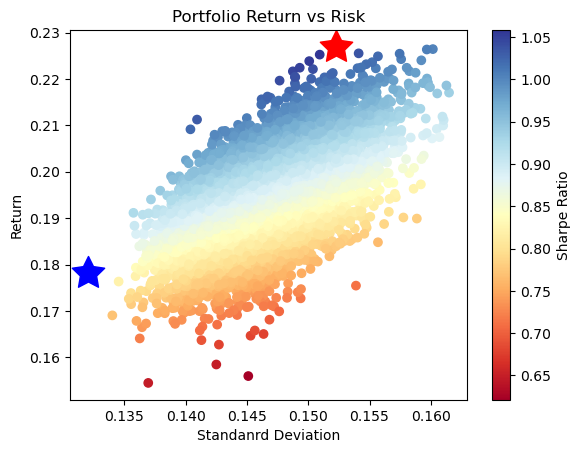

In [94]:
%matplotlib inline

plt.scatter(
    y= simulations_df['Returns'],
    x= simulations_df['Volatility'],
    c=simulations_df['Sharpe Ratio'],
    cmap= 'RdYlBu'
)
plt.title('Portfolio Return vs Risk')
plt.colorbar(label= 'Sharpe Ratio')
plt.xlabel('Standanrd Deviation')
plt.ylabel('Return')
plt.scatter(
    max_sharpe_ratio[1],
    max_sharpe_ratio[0],
    marker=(5, 1, 0),
    color= 'r',
    s=600)
plt.scatter(
    min_volatility[1],
    min_volatility[0],
    marker=(5, 1, 0),
    color= 'b',
    s=600)
plt.show()

Optimization

In [95]:
def get_metrics(weights: list) -> np.array:

    # Convert to a Numpy Array.
    weights = np.array(weights)

    # Calculate the returns, remember to annualize them (252).
    ret = np.sum(log_return.mean() * weights) * 252

    # Calculate the volatility, remember to annualize them (252).
    vol = np.sqrt(
        np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
    )

    # Calculate the Sharpe Ratio.
    sr = ret / vol

    return np.array([ret, vol, sr])

def grab_negative_sharpe(weights: list) -> np.array:
    return get_metrics(weights)[2] - 1

def grab_volatility(weights: list) -> np.array:
    return get_metrics(weights)[1]

def check_sum(weights: list) -> float:
    return np.sum(weights) - 1

In [96]:
# Define boundaries 

bounds= tuple((0,1) for symbol in range (number_of_tickers))

#define Constrains
constrains =[{'type': 'eq', 'fun' : check_sum}]

init_guess = number_of_tickers* [1/ number_of_tickers]

optimized_sharpe = sci_plt.minimize(grab_negative_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=constrains)
print('='*80) 
print('Optimized Sharpe Ratio')
print('='*80) 
print(optimized_sharpe)
print('='*80) 

Optimized Sharpe Ratio
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.6993385342819265
       x: [ 0.000e+00  1.823e-13 ...  0.000e+00  1.494e-13]
     nit: 7
     jac: [ 1.012e+00  1.755e-01 ...  8.363e-01  4.735e-01]
    nfev: 217
    njev: 7


In [97]:
# Grab the metrics.
optimized_metrics = get_metrics(weights=optimized_sharpe.x)

# Print the Optimized Weights.
print('')
print('='*80)
print('OPTIMIZED WEIGHTS:')
print('-'*80)
print(optimized_sharpe.x)
print('-'*80)


# Print the Optimized Metrics.
print('')
print('='*80)
print('OPTIMIZED METRICS:')
print('-'*80)
print(optimized_metrics)
print('-'*80)


OPTIMIZED WEIGHTS:
--------------------------------------------------------------------------------
[0.00000000e+00 1.82344254e-13 0.00000000e+00 0.00000000e+00
 3.97421455e-14 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.84273450e-14 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.55525100e-13 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.49390708e-13]
--------------------------------------------------------------------------------

OPTIMIZED METRICS:
--------------------------------------------------------------------------------
[0.07394515 0.24594156 0.30066147]
--------------------------------------------------------------------------------


In [98]:
# Define boundaries 

bounds= tuple((0,1) for symbol in range (number_of_tickers))

#define Constrains
constrains =[{'type': 'eq', 'fun' : check_sum}]

init_guess = number_of_tickers* [1/ number_of_tickers]

optimized_volatility = sci_plt.minimize(grab_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=constrains)
print('='*80) 
print('Optimized Volatility')
print('='*80) 
print(optimized_volatility)
print('='*80) 


Optimized Volatility
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.12033713181063717
       x: [ 3.638e-17  4.127e-02 ...  0.000e+00  0.000e+00]
     nit: 10
     jac: [ 1.774e-01  1.205e-01 ...  1.250e-01  1.331e-01]
    nfev: 310
    njev: 10


In [99]:
# Grab the metrics.
optimized_metrics = get_metrics(weights=optimized_volatility.x)

# Print the Optimized Weights.
print('')
print('='*80)
print('OPTIMIZED WEIGHTS:')
print('-'*80)
print(optimized_volatility.x)
print('='*80)


# Print the Optimized Metrics.
print('')
print('='*80)
print('OPTIMIZED METRICS:')
print('-'*80)
print(optimized_metrics)
print('='*80)


OPTIMIZED WEIGHTS:
--------------------------------------------------------------------------------
[3.63777929e-17 4.12704987e-02 1.25585418e-17 9.18885556e-18
 2.48184098e-17 4.18530169e-02 3.53490312e-02 0.00000000e+00
 0.00000000e+00 1.03070551e-01 1.14257163e-01 1.09000205e-02
 4.24563565e-04 1.05758655e-01 1.74968527e-02 0.00000000e+00
 5.26851918e-18 4.12957680e-02 1.54059178e-01 3.59200701e-02
 5.67850443e-02 9.04772292e-03 4.00683173e-18 1.02773461e-01
 0.00000000e+00 1.29738404e-01 0.00000000e+00 2.86540043e-18
 0.00000000e+00 0.00000000e+00]

OPTIMIZED METRICS:
--------------------------------------------------------------------------------
[0.14124607 0.12033713 1.17375304]
